In [35]:
# Install Library:

#!pip install pytesseract
#!pip install opencv-python
#!pip install pillow


In [36]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
from PIL import Image

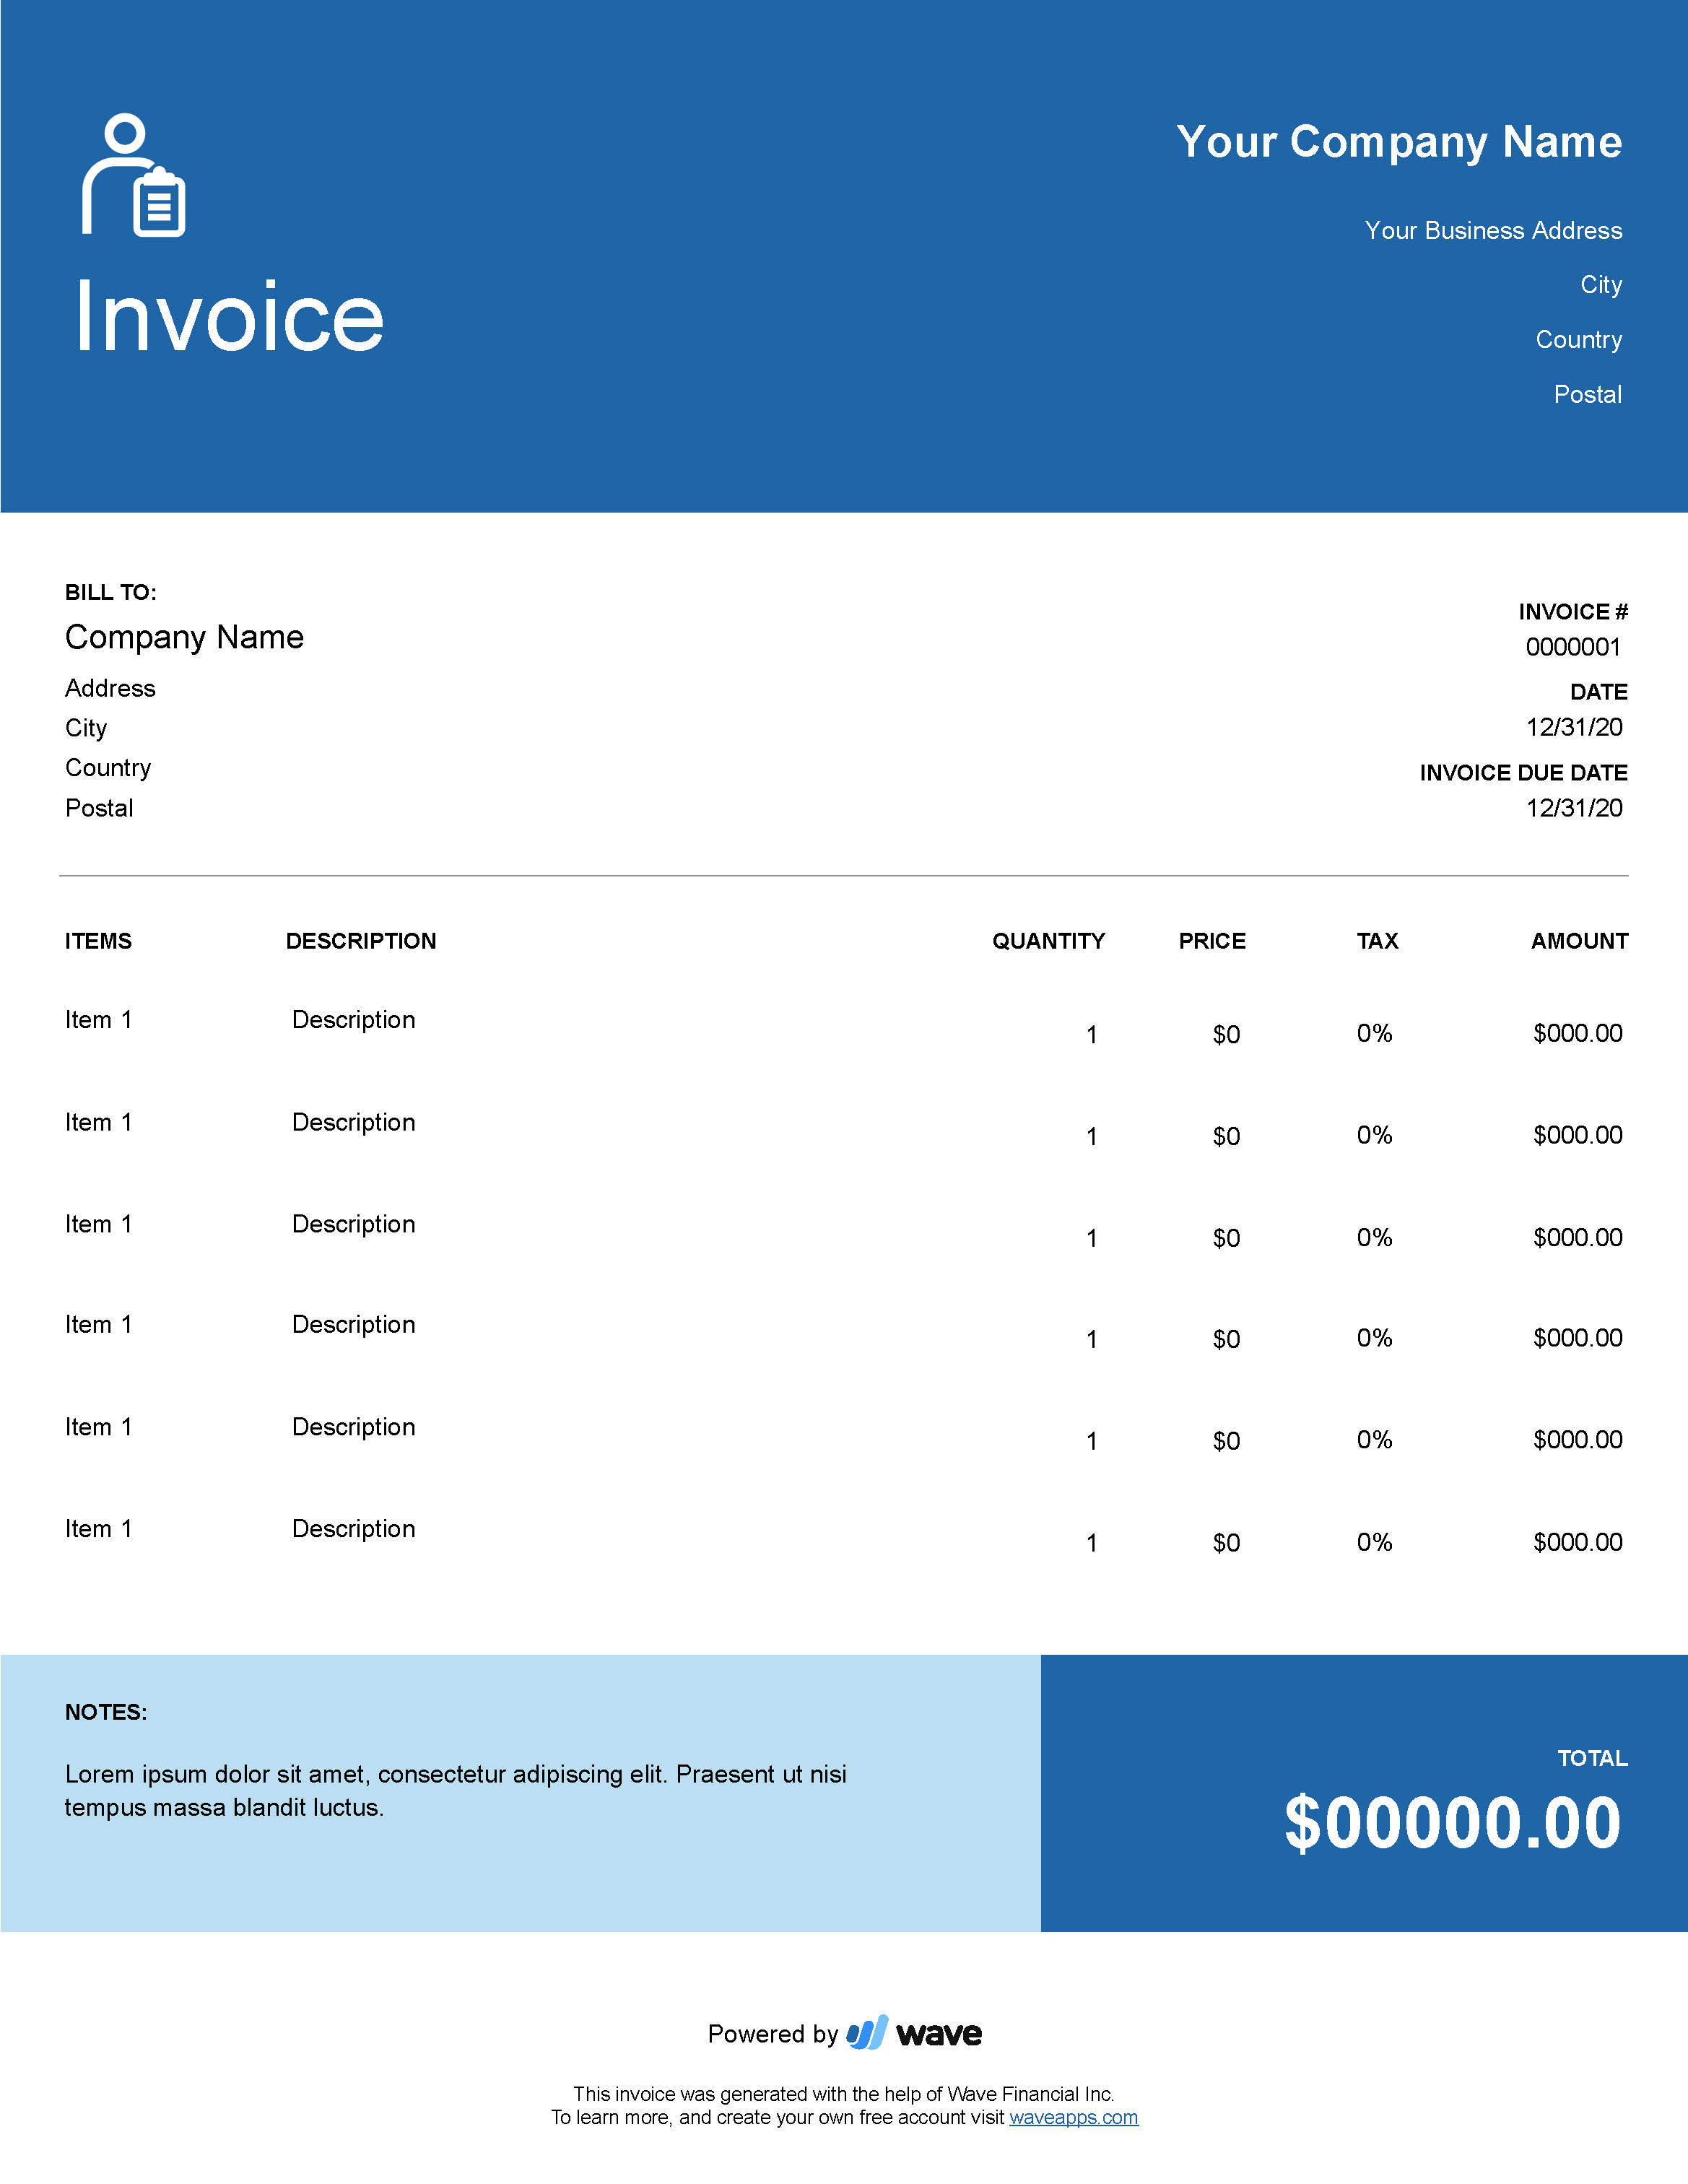

In [37]:
image = Image.open("__results___3_0.png")
image

In [38]:
import cv2 
import pytesseract
pytesseract.pytesseract.tesseract_cmd =r'C:\Users\ItShop\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

# I. Extract Text From Photo:

In [39]:
img = cv2.imread('__results___3_0.png')

custom_config = r'--oem 3 --psm 6'
text = pytesseract.image_to_string(img,config=custom_config)
print(text)

Oo Your Company Name
&) Your Business Address
Nn VO | ce Country
Postal
BILL TO:
INVOICE #
Company Name 0000001
Address DATE
City 12/31/20
Country INVOICE DUE DATE
Postal 12/31/20
ITEMS DESCRIPTION QUANTITY PRICE TAX AMOUNT
Item 1 Description 1 $0 0% $000.00
Item 1 Description 1 $0 0% $000.00
Item 1 Description 1 $0 0% $000.00
Item 1 Description 1 $0 0% $000.00
Item 1 Description 1 $0 0% $000.00
Item 1 Description 1 $0 0% $000.00
NOTES:
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Praesent ut nisi TOTAR
tempus massa blandit luctus. 00000 00
i |
Powered by #f/ Wave
This invoice was generated with the help of Wave Financial Inc.
To learn more, and create your own free account visit waveapps.com



# II. DRAW BOXES AROUND THE TARGET WORD:

In [40]:
# make a copy of this image to draw in
image_copy = img.copy()
# the target word to search for
target_word = "Item"
# get all data from the image
data = pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)
print(data.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [41]:
display(data['text'])

['',
 '',
 '',
 '',
 'oO',
 '',
 '',
 '',
 '(ea',
 '',
 '',
 '',
 'Invoice',
 '',
 '',
 '',
 'BILL',
 'TO:',
 '',
 '',
 'Company',
 'Name',
 '',
 '',
 'Address',
 '',
 '',
 'City',
 '',
 '',
 'Country',
 '',
 '',
 'Postal',
 '',
 '',
 'ITEMS',
 'DESCRIPTION',
 '',
 'Item',
 '1',
 'Description',
 '',
 'Item',
 '1',
 'Description',
 '',
 'Item',
 '1',
 'Description',
 '',
 'Item',
 '1',
 'Description',
 '',
 'Item',
 '1',
 'Description',
 '',
 'Item',
 '1',
 'Description',
 '',
 'NOTES:',
 '',
 '',
 '',
 'Lorem',
 'ipsum',
 'dolor',
 'sit',
 'amet,',
 'consectetur',
 'adipiscing',
 'elit.',
 'Praesent',
 'ut',
 'nisi',
 '',
 '',
 '',
 'tempus',
 'massa',
 'blandit',
 'luctus.',
 '',
 '',
 '',
 'QUANTITY',
 '',
 '',
 '',
 'Powered',
 'by',
 '#f/',
 'Wave',
 '',
 '',
 '',
 'This',
 'invoice',
 'was',
 'generated',
 'with',
 'the',
 'help',
 'of',
 'Wave',
 'Financial',
 'Inc.',
 '',
 'To',
 'learn',
 'more,',
 'and',
 'create',
 'your',
 'own',
 'free',
 'account',
 'visit',
 'waveapps.com

In [42]:
# get all occurences of the that word
word_occurences = [ x for x, word in enumerate(data["text"]) if word == target_word ]
word_occurences

[39, 43, 47, 51, 55, 59]

In [43]:
for occ in word_occurences:
    # extract the width, height, top and left position for that detected word
    x = data["left"][occ]
    y = data["top"][occ]
    w = data["width"][occ]
    h = data["height"][occ]
    # draw the rectangular:
    image_copy = cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

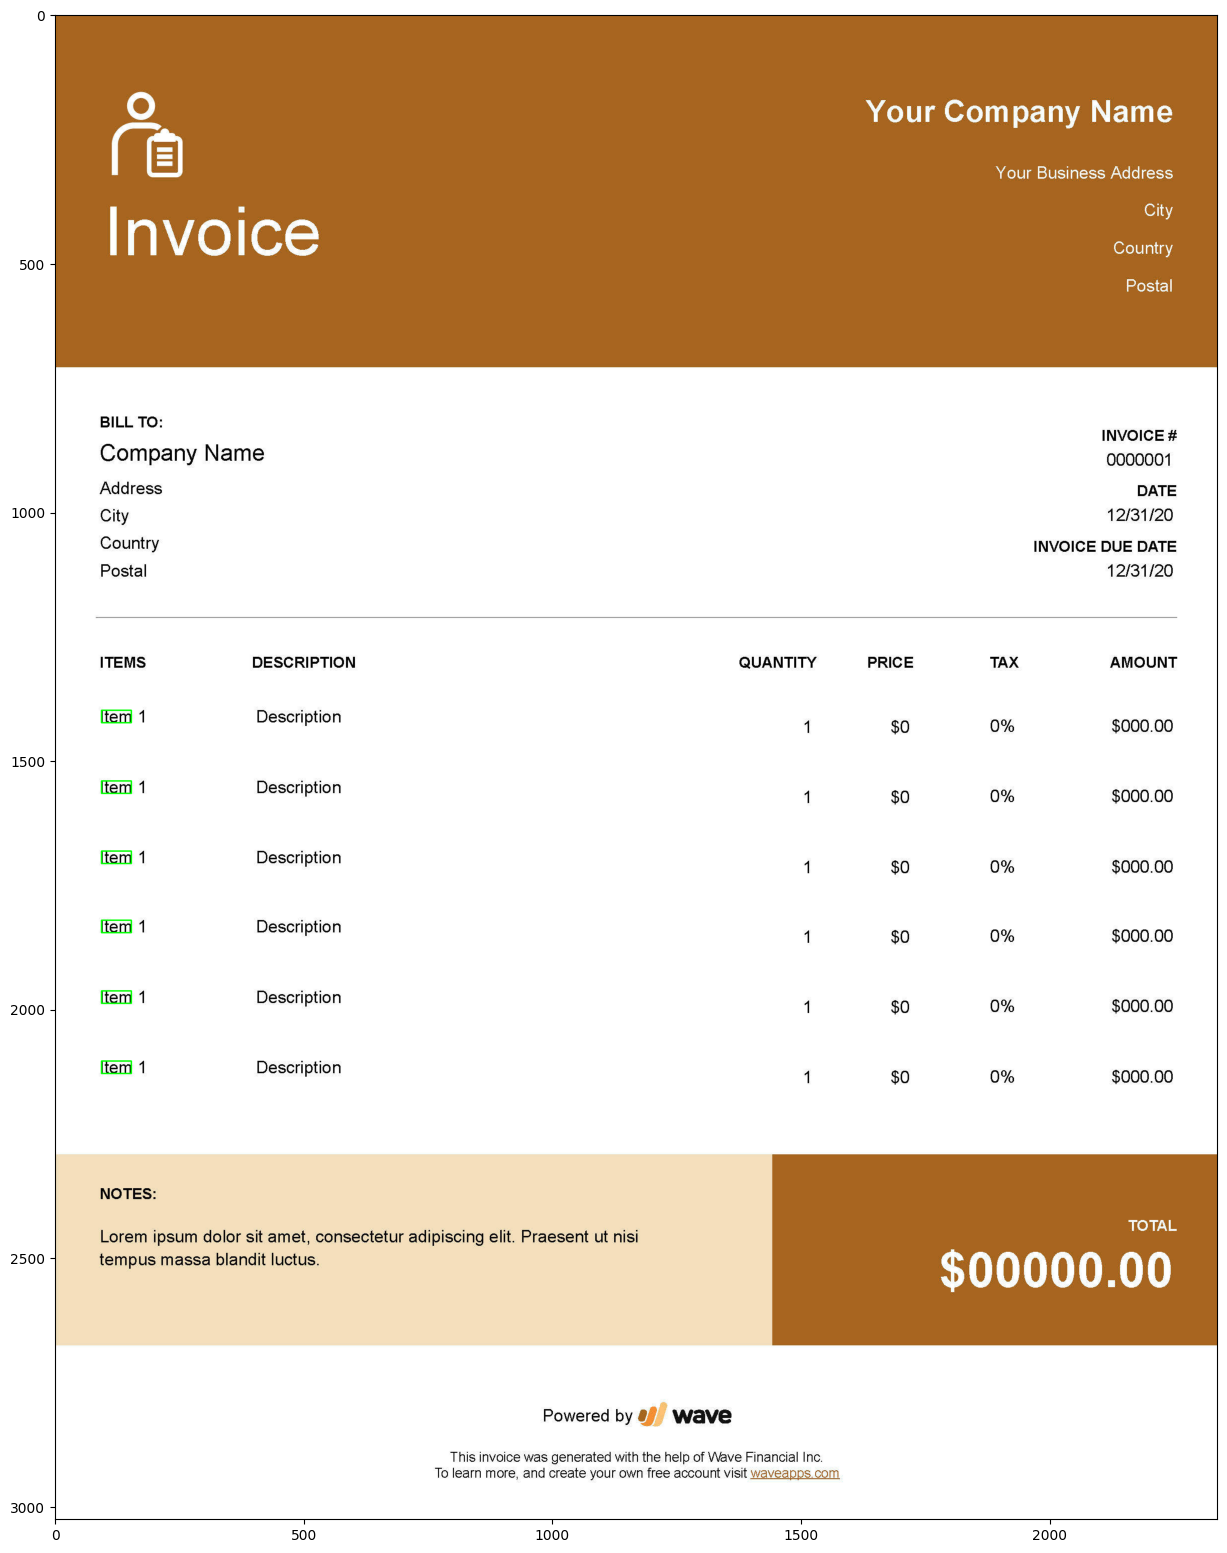

In [44]:
plt.imsave('all_item_word.png', image_copy)
plt.figure(figsize=(15,20))
plt.imshow(image_copy)
plt.show()
#cv2.waitKey(0)

## III. Getting boxes around all word:

In [45]:
image_all= img.copy()

In [46]:
n_boxes = len(data['text'])
for i in range(n_boxes):
    # extract the width, height, top and left position for that detected word
    x = data["left"][i]
    y = data["top"][i]
    w = data["width"][i]
    h = data["height"][i]
    # draw the rectangular:
    image_all = cv2.rectangle(image_all, (x, y), (x + w, y + h), (0, 0, 255), 2)
    

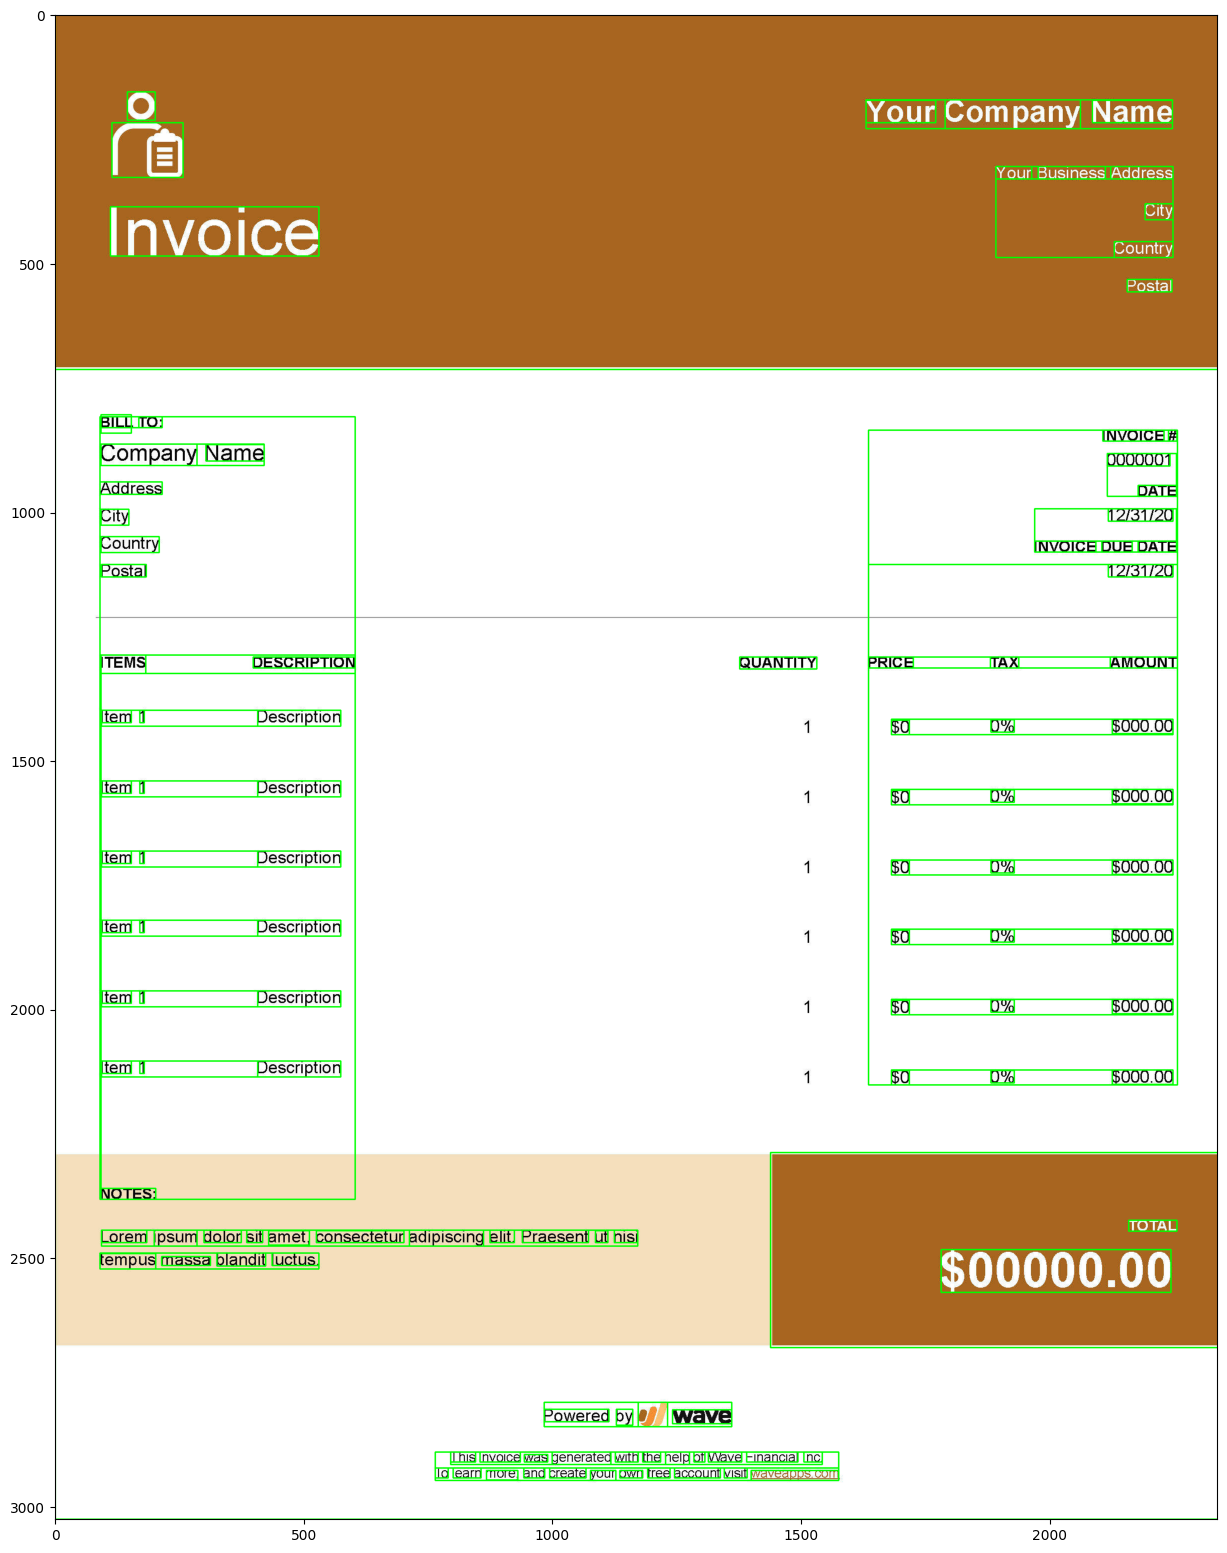

In [47]:
plt.imsave('image_all.png', image_all)
plt.figure(figsize=(15,20))
plt.imshow(image_all)
plt.show()


# IV.  Getting boxes around all single character:

In [48]:
import cv2
import pytesseract

img = cv2.imread('__results___3_0.png')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)




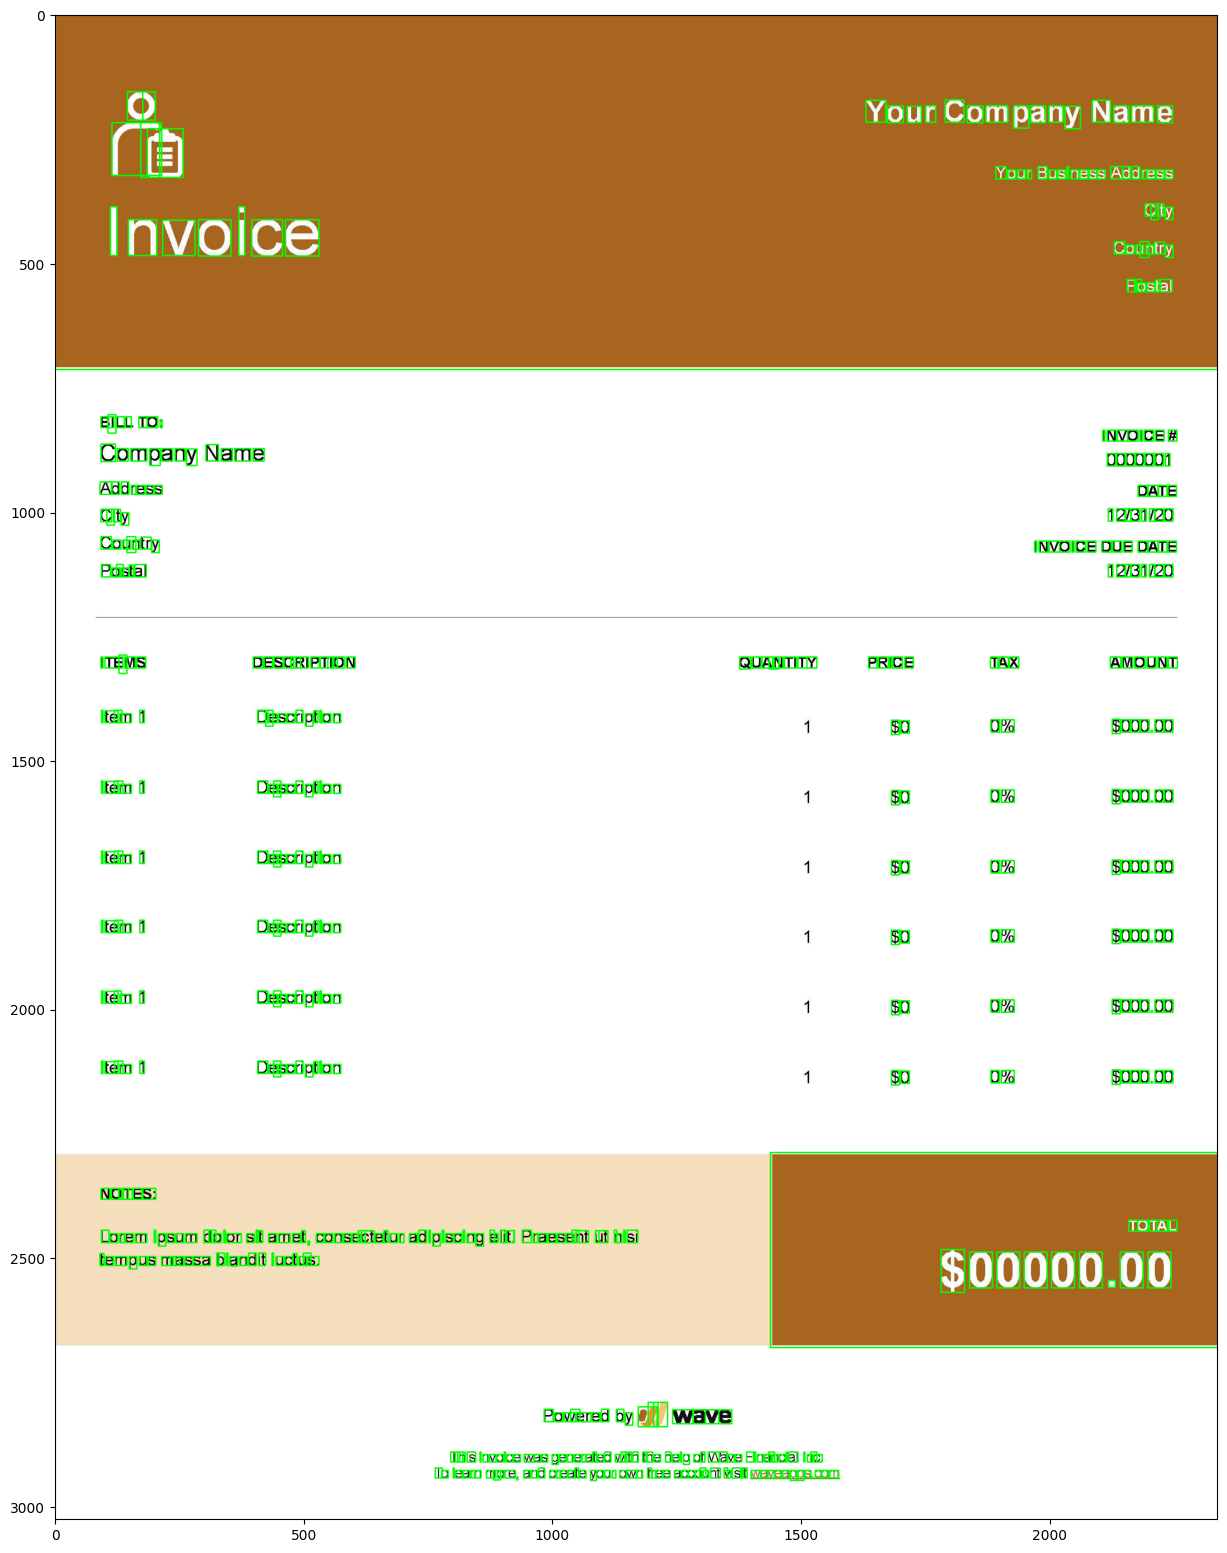

In [49]:
plt.figure(figsize=(15,20))
plt.imshow(img)
plt.show()

# V. Detect Only Digit:


In [50]:
custom_config = r'--oem 3 --psm 6 outputbase digits'
num= pytesseract.image_to_string(img, config=custom_config)
print(num)

7
2
1
4
00000
120
120
1 50 0 000.00
1 000.00
1 0 000.00
1 50 0 000.00
1 000.00
1 0 000.00
.
00000
.00.



# VI. Detect Only Text:

In [51]:
custom_config = r'-c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyz --psm 6'
text = pytesseract.image_to_string(img, config=custom_config)
print(text)

ourcompanyame
a
i
fa ourusnessddress
lnvoice
oe country
is
e
ompanyame ooel
ddness e
ity v
ountriy oee
icrstial v
e e x
teinf iescription on
telinf escription ce any
teiinf escription ce on
telinf escription on
teinf escription ce any
teiinf escription ce on
e
onempsumdiblonsitametconseittetunadipiscingelitpraeseintlithlsi
fempusmassablandifloctues
u u u u u u u
ovwenedbywave
liilslowolcewasgeoccaledwiihfhehelpoffarslodihotaltciet
bleannqoreaodoealisfoooownfhesacogihihisilmaveaonscom



Reference:

  https://nanonets.com/blog/ocr-with-tesseract/#tesseract-ocr
  
  https://www.thepythoncode.com/article/optical-character-recognition-pytesseract-python#:~:text=Optical%20Character%20Recognition%20is%20the,language)%20as%20a%20string%20variable.
  
  https://www.analyticsvidhya.com/blog/2021/06/optical-character-recognitionocr-with-tesseract-opencv-and-python/
  
  https://www.topcoder.com/thrive/articles/python-for-character-recognition-tesseract